In [1]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# 1. Specify Pathfile

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# 2. Specify Number of Classes

In [3]:
NUM_CLASSES = 56

# 3. Reading Dataset

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2)+1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=42)

# 4. Training Model

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [6]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 256)               11008     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 56)                7224      
                                                                 
Total params: 51,128
Trainable params: 51,128
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [8]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
167/172 [============================>.] - ETA: 0s - loss: 3.3457 - accuracy: 0.1330
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
172/172 [==============================] - 1s 3ms/step - loss: 3.3297 - accuracy: 0.1338 - val_loss: 2.5492 - val_accuracy: 0.3362
Epoch 2/1000
163/172 [===========================>..] - ETA: 0s - loss: 2.3807 - accuracy: 0.2818
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
172/172 [==============================] - 0s 2ms/step - loss: 2.3660 - accuracy: 0.2846 - val_loss: 1.7810 - val_accuracy: 0.4864
Epoch 3/1000
161/172 [===========================>..] - ETA: 0s - loss: 1.9446 - accuracy: 0.3903
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
172/172 [==============================] - 0s 2ms/step - loss: 1.9365 - accuracy: 0.3914 - val_loss: 1.3357 - val_accuracy: 0.6130
Epoch 4/1000
167/172 [============================>.] - ETA: 0s - loss: 1.7330 - accu

In [10]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=32)

58/58 [==============================] - 0s 1ms/step - loss: 0.3229 - accuracy: 0.8908


In [11]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [12]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[2.7739498e-08 5.8528690e-07 1.3814642e-04 2.6758717e-11 1.2601606e-10
 1.3110437e-04 6.3361233e-07 2.0376031e-11 5.4959946e-06 2.4085246e-11
 6.5768340e-06 3.0224960e-06 2.2312519e-01 8.5515156e-10 2.8502912e-12
 3.1500131e-06 1.8830850e-14 3.8717110e-14 3.6130186e-05 3.0725230e-05
 6.8839604e-01 2.5584023e-07 1.2876680e-09 7.3928717e-11 8.5288957e-02
 5.5637787e-07 3.0793913e-08 3.6603797e-07 4.4968255e-07 1.5105949e-11
 5.9388931e-06 3.5000898e-04 3.0548227e-07 9.7966800e-04 1.0112265e-09
 9.4486741e-06 1.2336869e-05 9.9448616e-10 1.1795177e-10 6.4476090e-08
 1.0518848e-12 1.3492923e-03 4.8630575e-09 4.8519403e-05 1.7448720e-05
 1.2529184e-13 5.7536065e-09 2.3628172e-06 1.7293122e-06 9.1540877e-18
 1.2093042e-12 3.8317780e-09 2.3201137e-05 2.5239017e-06 2.9739471e-05
 1.4043644e-09]
20


# 5. Check Trained Model

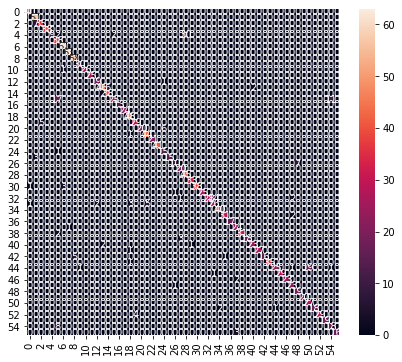

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       0.85      1.00      0.92        57
           2       0.88      0.83      0.85        42
           3       1.00      1.00      1.00        38
           4       1.00      0.21      0.35        43
           5       0.56      1.00      0.72        38
           6       0.94      1.00      0.97        62
           7       0.98      1.00      0.99        63
           8       0.92      1.00      0.96        58
           9       0.97      1.00      0.98        30
          10       1.00      0.96      0.98        27
          11       1.00      1.00      1.00        25
          12       0.90      0.95      0.93        20
          13       0.92      0.85      0.88        54
          14       0.86      0.95      0.90        40
          15       0.93      0.47      0.62        53
          16       1.00      1.00      1.00        13
     

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# 6. Convert to Tensorflow Lite

In [14]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [15]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/fr/jbv693556wl33l33vy0f6c080000gn/T/tmpxxceq4mf/assets


54424